IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import re
import lib.tools as t

In [2]:
from sys import path;
path.append('ingestion_program/')

data_dir = 'public_data'
data_name = 'Areal'

from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading public_data/Areal_train from AutoML format
Number of examples = 5200
Number of features = 49152
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10        sea
11   snowberg
12    wetland
Number of classes = 13


In [3]:
ys=[data.iloc[i][-1] for i in range(4000)]
xs=[list(data.iloc[i][:-1]) for i in range(4000)]

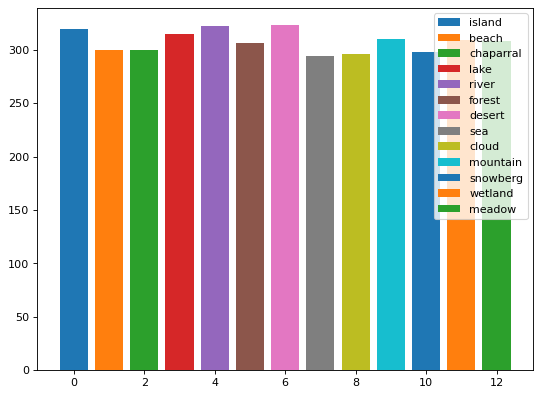

In [4]:
t.repartition(ys)

data scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [6]:
#scaler=MinMaxScaler()
scaler=StandardScaler()
xss=scaler.fit_transform(xs)

split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
        xss, ys, test_size=0.2)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca=PCA(20)
xr_train=pca.fit_transform(x_train)
xr_test=pca.transform(x_test)

Grid Search

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

In [11]:
model=SVC()
kernel=['rbf']
gamma=np.linspace(1e-6,1,10)
C=np.linspace(0.1,20,10)
params=[{'gamma':gamma,'C':C,'kernel':kernel}]
search=GridSearchCV(model,params)
search.fit(xr_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': array([ 0.1       ,  2.31111111,  4.52222222,  6.73333333,  8.94444444,
       11.15555556, 13.36666667, 15.57777778, 17.78888889, 20.        ]),
                          'gamma': array([1.00000e-06, 1.11112e-01, 2.22223e-01, 3.33334e-01, 4.44445e-01,
       5.55556e-01, 6.66667e-01, 7.77778e-01, 8.88889e-01, 1.00000e+00]),
                          'kernel': ['rbf']}])

In [12]:
best=search.best_estimator_
best.score(xr_test,y_test)

0.56625

the grid search gives us C=5 gamma=0.0001 with a rbf kernel

results

In [23]:
vali=SVC(C=5,gamma=0.0001,max_iter=400)
vali.fit(xr_train,y_train)
y_pred=vali.predict(xr_test)
vali.score(xr_test,y_test)

/home/come/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.6075

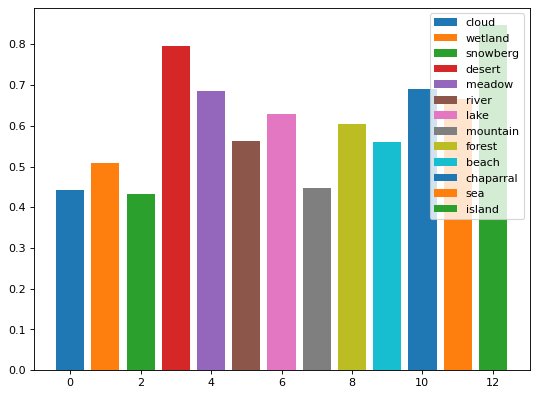

In [14]:
t.true_pred(y_pred,y_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

array([[37,  1,  5,  1,  0,  1,  0,  0,  4,  2,  1, 11,  0],
       [ 1, 40,  0,  6,  3,  0,  3,  0,  1,  1,  0,  0,  2],
       [ 5,  0, 27,  0,  0,  3,  1,  0,  0,  2,  3, 24,  3],
       [ 0,  5,  0, 51,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  1,  0, 49,  0,  1,  2,  1,  0,  0,  0,  7],
       [ 2,  0,  3,  0,  0, 61,  0,  0,  0,  2,  5,  3,  0],
       [ 1,  2,  1,  1,  3,  2, 27,  3,  9,  5,  1,  3,  2],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  2,  0,  0,  0,  3],
       [ 3,  9,  0,  4,  2,  0,  2,  9, 21,  7,  0,  0,  9],
       [ 0,  0,  5,  0,  3,  1,  3,  4,  5, 27,  5,  4,  4],
       [ 4,  0,  9,  1,  0,  3,  1,  0,  0,  2, 32,  1,  0],
       [12,  0, 10,  0,  0,  0,  1,  0,  0,  0,  0, 35,  0],
       [ 1,  1,  0,  0, 21,  1,  4,  4,  2,  0,  1,  0, 31]])

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
scores = cross_val_score(SVC(C=5,gamma=0.0001), pca.transform(xss),ys,cv=10)

In [19]:
scores.mean()

0.62975